In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm

In [2]:
#carga información
df = pd.read_csv('Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
import math
p = math.pi
print(p) 

3.141592653589793


In [6]:
# se considera la mitad del ancho como radio del cilindro
df['Width_2']=df['Weight']/2*df['Weight']/2

In [7]:
df['area']=df['Width_2']*p

In [8]:
# se considera altura como la altura del cilindro
df['Volumen']=df['Width_2']*df['Height']

In [9]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width,Width_2,area,Volumen
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,1.590000e+02,1.590000e+02
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486,71501.610708,2.246289e+05,8.902085e+05
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804,113754.193333,3.573693e+05,1.391245e+06
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600,0.000000,0.000000e+00,0.000000e+00
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650,3600.000000,1.130973e+04,2.230696e+04
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500,18632.250000,5.853494e+04,1.527328e+05
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500,105625.000000,3.318307e+05,1.313451e+06
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000,680625.000000,2.138246e+06,7.358918e+06


In [10]:
df = df.drop(columns='area')
df = df.drop(columns='Width_2')

C:\Users\susan\AppData\Local\Temp\ipykernel_17896\1414316522.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sinvol.corr(), annot=True, cmap=plt.cm.PuBu)


<Axes: >

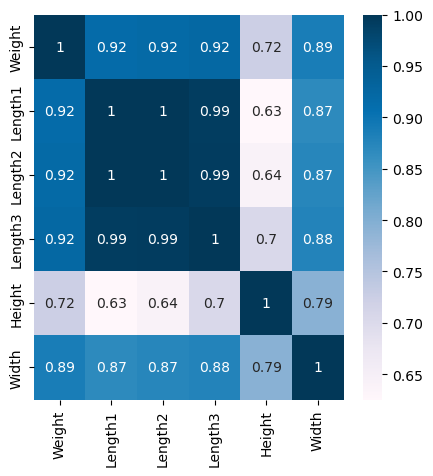

In [11]:
#sin volumen
df_sinvol=df.drop(columns='Volumen')
plt.figure(figsize=(5,5))
sns.heatmap(df_sinvol.corr(), annot=True, cmap=plt.cm.PuBu)

C:\Users\susan\AppData\Local\Temp\ipykernel_17896\4255367337.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)


<Axes: >

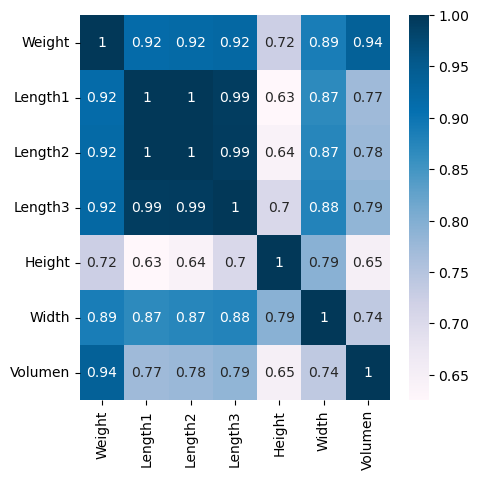

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)

In [13]:
#La mayoria de las variables están fuertemente correlacionadas. AL agregar volumen, esta se correlaciona sobre 0.5 con respecto
#a todas las demás variables. 

In [14]:
data1 = df[["Volumen", "Weight"]]
data1.head()

,Volumen,Weight
0,168664.3200,242.0
1,262392.0000,290.0
2,357718.4200,340.0
3,419354.8425,363.0
4,575223.9000,430.0


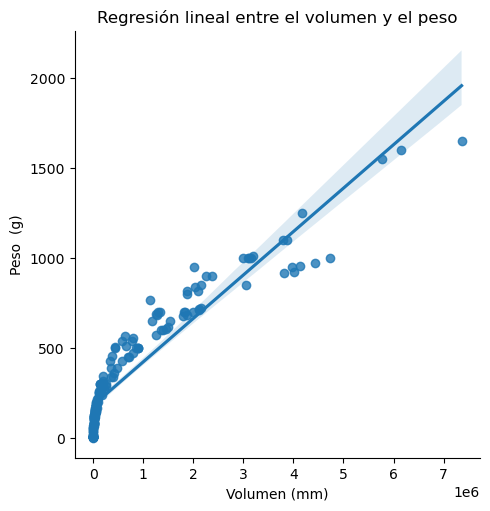

Pendiente: 0.00024124418373400094
Intercepto: 183.56878304733283
Error estándar: 7.142128016129268e-06
Coef. de correlación: 0.9375702770139194


In [15]:

# Realizar la regresión lineal
sns.lmplot(x="Volumen", y="Weight", data=data1)
plt.title("Regresión lineal entre el volumen y el peso")
plt.xlabel("Volumen (mm)")
plt.ylabel("Peso  (g)")

# Calcular los valores de la regresión lineal. Ya veremos el significado de los parámetros
slope, intercept, r_value, p_value, std_err = stats.linregress(data1["Volumen"], data1["Weight"])

# Mostrar el gráfico completo
plt.show()

print(f"Pendiente: {slope}")
print(f"Intercepto: {intercept}")
print(f"Error estándar: {std_err}")
print(f"Coef. de correlación: {r_value}")

In [16]:
#Parece haber una correlación lineal positiva 

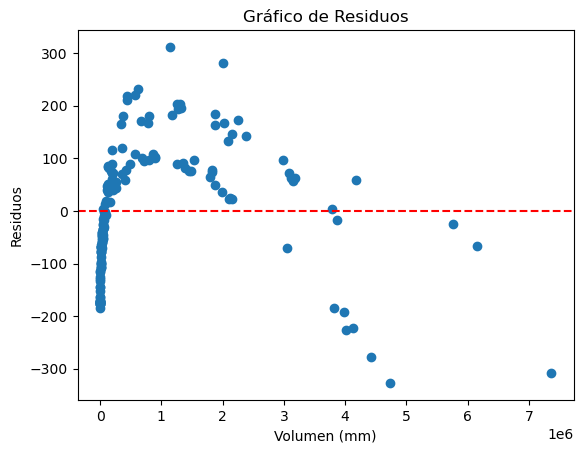

In [17]:
#Evaluacion de residuos
residuals = data1["Weight"] - (slope * data1["Volumen"] + intercept)

# Mostrar un gráfico de los residuos
plt.figure()
plt.scatter(data1["Volumen"], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gráfico de Residuos")
plt.xlabel("Volumen (mm)")
plt.ylabel("Residuos")
plt.show()

In [18]:
# Paso 1: Definir variables predictoras (X) y variable de respuesta (y)
X = df[['Volumen', 'Species']]  # Largo de la aleta y sexo como variables independientes
y = df['Weight']  # Peso como variable dependiente

# Codificar la variable categórica 'sex' usando get dummies
X_encoded = pd.get_dummies(X, columns=['Species'], prefix=['Species'])

# Paso 2: Agregar una constante (intercepto) a las variables predictoras
X_encoded = sm.add_constant(X_encoded)

# Paso 3: Crear el modelo de regresión lineal
model = sm.OLS(y, X_encoded).fit()

# Paso 4: Obtener resultados del modelo
results = model.summary()

predictions = model.predict(X_encoded)

# Calcular el Error Cuadrático Medio (MSE)
mse = ((y - predictions) ** 2).mean()

# Calcular el Error Cuadrático Medio Explicado (EMSE)
emse = mse / ((y - y.mean()) ** 2).mean()

# Obtener el valor R² del modelo
r2 = model.rsquared

print(results)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Error Mean Squared Explicado (EMSE): {emse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     258.0
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           1.30e-80
Time:                        13:06:08   Log-Likelihood:                -956.45
No. Observations:                 159   AIC:                             1929.
Df Residuals:                     151   BIC:                             1953.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               172.6060      9.93

In [19]:
# Si se compara el coeficiente de correlación R^2, entre los dos modelos, se puede aprecia que al dividir
# por especies, sigue siendo un alto valor. Indicando que ambos modelos explican bastante bien la variable peso

In [20]:
#Modelo predictivo, se elige Weight como variable a predecir por la información entregada en las variables

y= df['Weight']
X = df[['Volumen','Length1','Length2','Length3','Height','Width']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1121)

In [21]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width,Volumen
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,1.590000e+02
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486,8.902085e+05
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804,1.391245e+06
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600,0.000000e+00
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650,2.230696e+04
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500,1.527328e+05
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500,1.313451e+06
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000,7.358918e+06


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
 7   Volumen  159 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.1+ KB


In [23]:
X_train.head()

,Volumen,Length1,Length2,Length3,Height,Width
141,4.174336e+06,52.0,56.0,59.7,10.6863,6.9849
147,2.117290e+01,10.1,10.6,11.6,1.7284,1.1484
67,6.788610e+04,19.0,20.7,23.2,9.3960,3.4104
47,4.096000e+04,21.1,22.5,25.0,6.4000,3.8000
99,5.215995e+04,23.0,25.0,26.5,6.4395,3.6835


In [24]:
#Con intercepto
#Instanciamos el modelo
lm_1 = linear_model.LinearRegression(fit_intercept=True)


In [25]:
#Entrenamos
lm_1.fit(X_train, y_train)
#Predecimos en  test
#Prediccion de la matriz de prueba
predictions_test_1 = lm_1.predict(X_test)
#predictions_test_1

In [26]:
def report_scores(prediction_test, vector):
    """Cálculo del error cuadratico medio y R cuadrado para un modelo de regresión lineal """
    #Realizamos métricas 
    mse=mean_squared_error(vector, prediction_test).round(2)
    r2=r2_score(vector, prediction_test).round(2)
    print(f'Error cuadrático medio: ', mse, 'R2: ', r2)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
report_scores(predictions_test_1, y_test)

Error cuadrático medio:  2598.3 R2:  0.98


In [29]:
# En comparación entre este modelo con todas las variables y los modelos anteriores, este presenta un mayor R^2, y un
# menor error cuadrático medio. que el anterior. Podría decirse que este modelo es mejor, lo que podría implicar que además de
#volumen existen más variables que tienen significancia en el cálculo de la predicción para la variable peso. 